In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numericalIntegration import plot_numerical_integration, trapzf, trapzd
from scipy.integrate import trapezoid, cumulative_trapezoid

# Métodos numéricos

<img src="figures/LogoCinvestav.png" style="height:100px" title="Cinvestav">

**CINVESTAV Unidad Saltillo**

**Curso Propedeutico del Programa de Maestría en Ciencias en Ingeniería Metalúrgica**

Dr. Edgar Ivan Castro Cedeño


Enero - Junio 2025

Contacto:
[edgar.castro@cinvestav.mx](mailto:edgar.castro@cinvestav.mx)

## 4.1 Método del trapecio

### 4.1.1 Explicación


Partiendo de la estrategia general para evaluar numéricamente una integral, expresandola como una suma discreta que aproxima el valor numérico de la misma:

$$ I = \int_{a}^{b} f(x) dx \approx \sum_{i=1}^{n} w_i f(x_i) + r_n$$

Se aproxima $f(x)$ mediante un polinomio de grado uno, que se puede construir mediante un polinomio de Lagrange:

$$f_1(x) = \frac{x - x_1}{x_0 - x_1} f(x_0) + \frac{x - x_0}{x_1 - x_0} f(x_1)$$

Notese que para aproximar la función, se requiere de dos puntos, $x_0, x_1$.

En el **Método del Trapecio**, la integral de $f(x)$ se aproxima mediante la integral de un polinomio de grado uno:

$$I = \int_{a}^{b} f(x) dx \approx \int_{a}^{b} f_1(x) dx$$


Evaluando en los extremos del intervalo $[a, b]$, se obtiene:


$$I = \int_{a}^{b} f(x) dx \approx \underbrace{(b-a)}_{\mathrm{base}} \,\,\underbrace{\frac{f(a) + f(b)}{2} }_{\mathrm{promedio\,de\,alturas}}$$

<details>
<summary><b>Derivación</b></summary>

<div class="class alert-info">

**Aproximación de la función mediante una línea recta**:

La ecuación de una línea recta que pase por los punto $f(a), f(b)$, se puede representar como:

$$f_1(x) = f(a) + \frac{f(b) - f(a)}{b-a} (x-a)$$

El área bajo la línea recta es un estimado de la integral de $f(x)$ entre los límites $[a, b]$:

$$I = \int_a^b f(x) dx \approx \int_a^b \left[f(a) + \frac{f(b) - f(a)}{b-a} (x-a) \right] dx$$

Desarrolando los términos dentro de la integral se obtiene:

$$ I \approx \int_a^b \left[\underbrace{\frac{f(b) - f(a)}{b-a}}_{\mathrm{pendiente}} x + \underbrace{f(a) -  \frac{f(b) - f(a)}{b-a} a}_{\mathrm{ordenada}}  \right] dx $$

Agrupando términos en la parte de la ordenada, se obtiene:

$$ I \approx \int_a^b \left[\frac{f(b) - f(a)}{b-a} x -  \frac{bf(a) - af(b)}{b-a}\right] dx $$

**Integración de la ecuación**:

Integrando entre los límites definidos, se obtiene:

$$ I \approx \left. \frac{f(b) - f(a)}{b-a} \frac{x^2}{2} + \frac{bf(a) - af(b)}{b-a} x \right|_a^b$$

Evaluando en los límites:

$$ I \approx  \frac{f(b) - f(a)}{b-a} \frac{b^2 - a^2}{2} + \frac{bf(a) - af(b)}{b-a} (b-a) $$

Factorizando y desarrolando términos:

$$ I \approx  \frac{f(b) - f(a)}{\cancel{b-a}} \frac{\cancel{(b-a)}(b+a)}{2} + \frac{bf(a) - af(b)}{\cancel{b-a}} (\cancel{b-a})$$

$$ I \approx  \frac{1}{2} \left[f(b) - f(a)\right](b+a) + bf(a) - af(b)$$

$$ I \approx  \frac{1}{2} \left[bf(b) - bf(a) + af(b) - af(a)\right] + bf(a) - af(b)$$

$$ I \approx  \frac{1}{2} b f(b) + \frac{1}{2} b f(a) - \frac{1}{2} a f(b) - \frac{1}{2} a f(a)$$

Agrupando términos:

$$ I \approx \frac{1}{2} b \left[f(a) + f(b)\right] - \frac{1}{2} a \left[f(a) + f(b)\right]$$

$$ I \approx \left(b - a \right) \frac{f(a) + f(b)}{2}$$


</div>

</details>

**Mejorando la precisión**

Para mejorar la precisión del método del trapecio, el intervalo $[a, b]$ se puede dividir en múltiples segmentos, a los cuáles se les aplica la regla del trapecio de manera individual.




Cuando se tienen $n$ segmentos equiespaciados, delimitados por $n+1$ puntos equiespaciados ($x_0, x_1, x_2, \cdots, x_n$), el tamaño de cada segmento es:

$$h = \frac{b-a}{n}$$

Sustituyendo la regla del trapecio para todos los segmentos individuales se obtiene:

$$I \approx h \frac{f(x_0)+f(x_1)}{2} + h \frac{f(x_1)+f(x_2)}{2} + \cdots + h \frac{f(x_{n-1})+f(x_n)}{2}$$

Agrupando términos se obtiene:

$$I \approx \frac{h}{2} \left[ f(x_0) + 2 \sum_{i=1}^{n-1} f(x_i) + f(x_n)\right]$$

que también se puede escribir como:

$$I \approx \underbrace{(b-a)}_{\mathrm{base}} \,\, \underbrace{\frac{(x_0) + 2 \sum_{i=1}^{n-1} f(x_i) + f(x_n)}{2n}}_{\mathrm{promedio\,de\,alturas}}$$


En los bloques de código debajo se muestra el proceso de integración por el método del trapecio para una función conocida `f`, entre los límites del intervalo de integración `a`, `b`, para un número dado de intervalos `N`.

In [2]:
f = lambda x: 3+ x + x**2 + x**3 + x**4
a = -1 # límite inferior
b = 1 # límite superior
N = [1, 2, 10, 20] # lista con número de intervalos

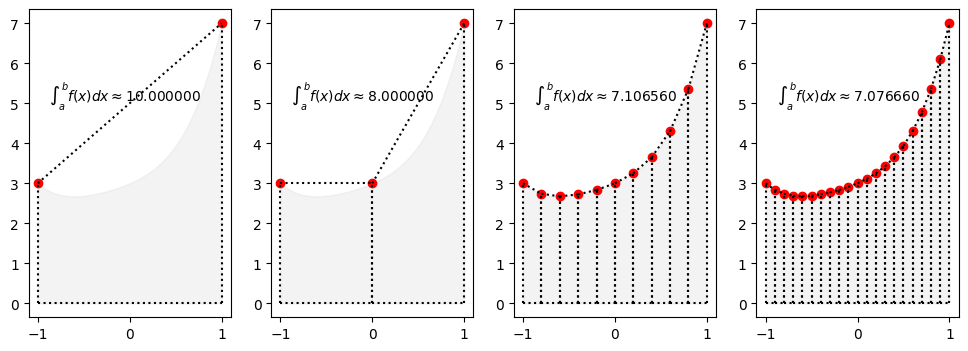

In [3]:
# Esquema gráfico para diferentes números de intervalos
fig, axes = plt.subplots(ncols=len(N), figsize=(12, 4))
for i, n in enumerate(N):
    plot_numerical_integration(f, a, b, N=n, method='trapezoid', ax=axes[i])
plt.show()

### 4.1.2 Ejemplos

#### 4.1.2.1 Integración de una función conocida

En estos casos, se conoce la forma de la función $f(x)$, para la cuál pueda o no estar definida la integral analítica.

In [4]:
f = lambda x: np.exp(np.exp(x))
a = 0 # límite inferior
b = 1 # límite superior
N = [1, 2, 10, 20] # lista con número de intervalos

# implementación propia de la función
for n in N:
    print(f"N = {n}, I ~ {trapzf(f, a, b, n)}")

N = 1, I ~ 8.936272034969154
N = 2, I ~ 7.068298899879558
N = 10, I ~ 6.348534446815682
N = 20, I ~ 6.324573733400853


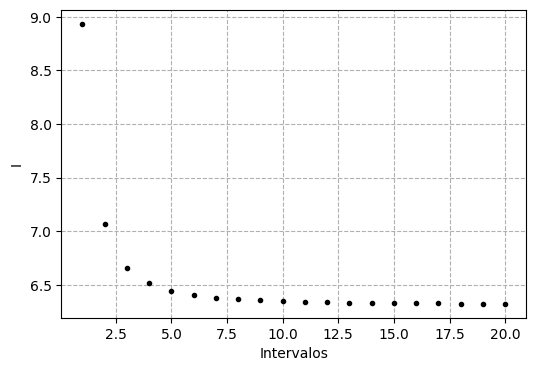

In [5]:
# convergencia del método al incrementar el número de intervalos
fig, ax = plt.subplots(figsize=(6, 4))
for n in range(1,21):
    ax.plot(n, trapzf(f, a, b, n), '.k')
ax.set(xlabel="Intervalos", ylabel="I")
ax.grid(ls="--")
plt.show()

#### 4.1.2.2 Datos tabulados para los que no se conoce la función a integrar

En estos casos se tiene un grupo de pares de datos $[x, y]$, pero se desconoce la forma fundamental de la función.

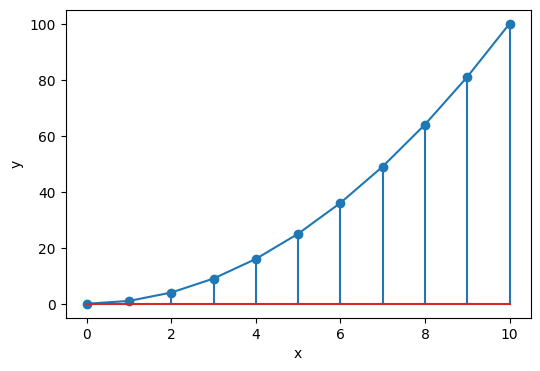

In [6]:
x = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
y = np.array([0, 1, 4, 9, 16, 25, 36, 49, 64, 81, 100])

fig, ax = plt.subplots(figsize=(6, 4))
ax.plot(x, y)
ax.stem(x, y)
ax.set(xlabel='x', ylabel='y')
plt.show()

In [7]:
integral = trapzd(x, y)
print(f"I ~ {integral}")

I ~ 335.0


### 4.1.3 Integración trapezoidal utilizando implementación en `scipy`

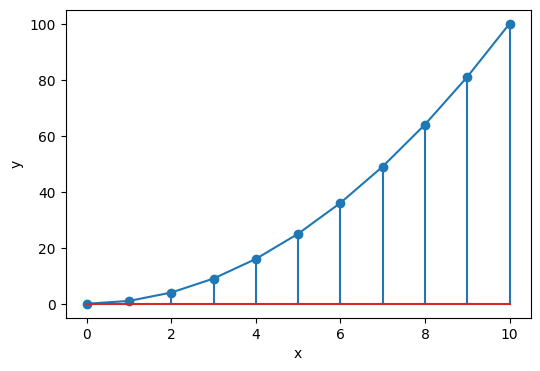

In [8]:
x = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
y = np.array([0, 1, 4, 9, 16, 25, 36, 49, 64, 81, 100])

fig, ax = plt.subplots(figsize=(6, 4))
ax.plot(x, y)
ax.stem(x, y)
ax.set(xlabel='x', ylabel='y')
plt.show()

La estimación de una integral por el método del trapecio se hace utilizando la función `trapezoid` de la librería `scipy`.

In [9]:
help(trapezoid)

Help on function trapezoid in module scipy.integrate._quadrature:

trapezoid(y, x=None, dx=1.0, axis=-1)
    Integrate along the given axis using the composite trapezoidal rule.
    
    If `x` is provided, the integration happens in sequence along its
    elements - they are not sorted.
    
    Integrate `y` (`x`) along each 1d slice on the given axis, compute
    :math:`\int y(x) dx`.
    When `x` is specified, this integrates along the parametric curve,
    computing :math:`\int_t y(t) dt =
    \int_t y(t) \left.\frac{dx}{dt}\right|_{x=x(t)} dt`.
    
    Parameters
    ----------
    y : array_like
        Input array to integrate.
    x : array_like, optional
        The sample points corresponding to the `y` values. If `x` is None,
        the sample points are assumed to be evenly spaced `dx` apart. The
        default is None.
    dx : scalar, optional
        The spacing between sample points when `x` is None. The default is 1.
    axis : int, optional
        The axis along 

In [10]:
integral = trapezoid(y, x)
print(f"I ~ {integral}")

I ~ 335.0


Cuando se desea conocer el valor acumulado de la integral al visitar cada segmento, se puede utilizar la función `cumulative_trapezoid()`.

In [11]:
help(cumulative_trapezoid)

Help on function cumulative_trapezoid in module scipy.integrate._quadrature:

cumulative_trapezoid(y, x=None, dx=1.0, axis=-1, initial=None)
    Cumulatively integrate y(x) using the composite trapezoidal rule.
    
    Parameters
    ----------
    y : array_like
        Values to integrate.
    x : array_like, optional
        The coordinate to integrate along. If None (default), use spacing `dx`
        between consecutive elements in `y`.
    dx : float, optional
        Spacing between elements of `y`. Only used if `x` is None.
    axis : int, optional
        Specifies the axis to cumulate. Default is -1 (last axis).
    initial : scalar, optional
        If given, insert this value at the beginning of the returned result.
        0 or None are the only values accepted. Default is None, which means
        `res` has one element less than `y` along the axis of integration.
    
    Returns
    -------
    res : ndarray
        The result of cumulative integration of `y` along `axi

In [12]:
cumulative_integral = cumulative_trapezoid(y, x)
for i in range(len(cumulative_integral)):
    print(f"{i+1}, {cumulative_integral[i]}")

1, 0.5
2, 3.0
3, 9.5
4, 22.0
5, 42.5
6, 73.0
7, 115.5
8, 172.0
9, 244.5
10, 335.0
